# American Census

In [27]:
# import the libraries which will be used
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

import warnings
warnings.filterwarnings("ignore")

## Global config

In [28]:
# data config
path_to_csv = "adult.csv"

## Load data

In [113]:
# data import
x_train_raw = pd.read_csv("X_train.csv")
y_train_raw = pd.read_csv("y_train.csv")

x_test_raw = pd.read_csv("X_test.csv")

## Helpers

## Data exploration

### Question 1
<span style="color:#e6bc53">(1 point) Explore the features and target variables of the dataset. What is the right performance metric to use for this dataset? Clearly explain which performance metric you
choose and why. Use no more than 125 words.</span>

<P>We prefer to choose F1-score as our performance metric for this dataset. There are mainly three reasons for this choice.
<P>1. This is a real-life binary classification problem, for which F1-score is widely used.
<P>2. When we explore the label set, we find that the set is imbalanced. There are approximately 4K people have the salaries above the threshold, but about 12K people are below that threshold. F1-score is a better metric to evaluate the imbalanced class distribution which has a large number of actual negatives, because the return value of F1-score is a harmonic mean of precision and recall.
<P>3. We are familiar with this type of metric.


### Question 2
<span style="color:#e6bc53">(1 point) Algorithmic bias can be a real problem in Machine Learning. So based on this,
should we use the Race and the Sex features in our machine learning algorithm? Clearly
explain what you believe, also provide us with arguments why. Note this question will
be graded based only on your argumentation. Use no more than 75 words.</span>

It depends on the target or the goal of our model. If we advocate using these features to dig out and to report the problem relative to racial and gender discriminations, or even age and academic discriminations, these features should be taken into consideration, since we want to use these features to find out the biases, to report them, and even to reduce and eliminate them, in order to build an impartial and harmonious society.

In [30]:
# print some samples to see how the training set looks like
x_train_raw.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
2,44,12.0,50,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,53,10.0,50,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,41,10.0,40,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States


In [31]:
# print the overview information of the training set
x_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       15344 non-null  object 
 4   education       16280 non-null  object 
 5   marital-status  16280 non-null  object 
 6   occupation      15099 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  native-country  15980 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB


In [32]:
# print some samples to see how the training labels look like
y_train_raw.head()

,salary
0,0
1,0
2,0
3,1
4,1


In [33]:
# print the overview information of the training labels
y_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   salary  16280 non-null  int64
dtypes: int64(1)
memory usage: 127.3 KB


In [34]:
# print some samples to see how the testing set looks like
x_test_raw.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,74,10.0,40,Self-emp-inc,Some-college,Widowed,Exec-managerial,Unmarried,White,Male,United-States
1,17,8.0,15,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
2,60,10.0,32,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Other,Male,United-States
3,62,9.0,42,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,United-States
4,52,10.0,65,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [35]:
# print the overview information of the testing set
x_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14747 entries, 0 to 14746
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             14747 non-null  int64  
 1   education-num   14747 non-null  float64
 2   hours-per-week  14747 non-null  int64  
 3   workclass       14747 non-null  object 
 4   education       14747 non-null  object 
 5   marital-status  14747 non-null  object 
 6   occupation      14747 non-null  object 
 7   relationship    14747 non-null  object 
 8   race            14747 non-null  object 
 9   sex             14747 non-null  object 
 10  native-country  14747 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [36]:
# print the corresponding number of each label
print("label:\t", np.unique(y_train_raw, return_counts=True)[0])
print("number:\t", np.unique(y_train_raw, return_counts=True)[1])

label:	 [0 1]
number:	 [12360  3920]


## Data exploration

### Question 1
<span style="color:#e6bc53">(2 points) This dataset hasn’t been cleaned, yet. Do this by finding all the missing values
and handling them. How did you handle these missing values? Clearly explain which
values were missing and how you handled them. Use no more than 100 words.</span>

<P>There are 1573 samples, which contain at least one missing feature values, in the training set. We used two different ways - dropping the incomplete samples or filling the missing value - to preprocess the data. Dropping them is the simplest method, but we will lose about 10% training samples; whereas, filling them will manually add noise. For the filling method, we will create a new group " Unknown" for the missing categorical features and use mean value to fill the missing numeric features.

In [37]:
# find the rows which has the missing value(s)
x_trian_miss = x_train_raw[x_train_raw.isnull().any(axis=1)==True]
x_trian_miss.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
26,55,13.0,40,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,United-States
35,49,9.0,60,NaN,HS-grad,Married-civ-spouse,NaN,Wife,White,Female,United-States
37,31,5.0,25,NaN,9th,Divorced,NaN,Not-in-family,White,Female,United-States
47,61,9.0,40,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,United-States


In [38]:
# count missing values for each feature
print(np.sum(pd.isna(x_train_raw)))

age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
dtype: int64


In [39]:
# Method 1:
# drop the rows which contain the missing value(s)

x_train_drop = x_train_raw[x_train_raw.notnull().all(axis=1)==True]
y_train_drop = y_train_raw[x_train_raw.notnull().all(axis=1)==True]

assert(x_train_drop.shape[0] == y_train_drop.shape[0])
print("the numer of original samples:", x_train_raw.shape[0])
print("the number of preserving samples:", x_train_drop.shape[0])
print("the number of dropping samples:", x_trian_miss.shape[0])

the numer of original samples: 16280
the number of preserving samples: 14707
the number of dropping samples: 1573


In [40]:
# Method 2:
# manually fill the rows which contain the missing value(s)

# replace NaN in categorical features with new group " Unknown"
x_train_fill = x_train_raw.copy()
nullCatFeature = ['workclass', 'occupation', 'native-country']
for feature in nullCatFeature:
    x_train_fill[feature].replace(to_replace=np.nan, value=" Unknown", inplace=True)  

# fill NaN in the numeric feature with the mean value 
x_train_fill['education-num'].fillna(x_train_fill['education-num'].mean(), inplace=True)

# till now, there is no missing value
print(np.sum(x_train_fill.isna()))
# and no dropping sample
assert(len(x_train_fill == x_train_raw))
print("Sample Number:", len(x_train_fill))

# as no dropping samples, the label set is the same as before
y_train_fill = y_train_raw.copy()

age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64
Sample Number: 16280


In [41]:
# summarize for the results from method 1 and 2
print("Method 1: \n training samples with their lables:")
print(" x_train_drop", x_train_drop.shape, '\t', "y_train_drop", y_train_drop.shape)
print("Method 1: \n training samples with their lables:")
print(" x_train_fill", x_train_fill.shape, '\t', "y_train_fill", y_train_fill.shape)

Method 1: 
 training samples with their lables:
 x_train_drop (14707, 11) 	 y_train_drop (14707, 1)
Method 1: 
 training samples with their lables:
 x_train_fill (16280, 11) 	 y_train_fill (16280, 1)


### Question 2
<span style="color:#e6bc53">(2 points) All Scikit-learn’s implementations of these algorithms expect numerical features. Check for all features if they are in numerical format. If not, transform these features into numerical ones. Clearly explain which features you transformed, how you
transformed them and why these transformations. Use no more than 75 words. (You
might want to read the preprocessing documentation of Scikit-learn for handy tips.)</span>

There are some categorical features which are "workclass", "education", "marital-status", "occupation", relationship", "race", "sex" and "native-country". We used OrdinalEncoder to encode these features. OrdinalEncoder can change the categorical features into numeric integer formats, which will become acceptable to the implementations.

In [42]:
# categorical features
cat_features = ["workclass", "education", "marital-status", "occupation", 
                "relationship", "race", "sex", "native-country"]

# origianl numeric features
num_features = ["age", "education-num", "hours-per-week"]

# they are not numbers
x_train_raw[cat_features].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
2,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States


In [43]:
# transform the categorical features for both methods

# encode categorical features
def catEncoder(x, cat_feature = cat_features, num_feature = num_features):   
    enc = preprocessing.OrdinalEncoder() # define the type of encoder
    enc.fit(x[cat_feature]) # data fitting
    X_cat = enc.transform(x[cat_feature]) # data transformation
    X_num = np.array(x[num_feature])
    X = np.concatenate((X_num, X_cat), axis=1)
    return X

X1 = catEncoder(x_train_drop)
Y1 = np.array(y_train_drop).reshape([len(y_train_drop), ])

X2 = catEncoder(x_train_fill)
Y2 = np.array(y_train_fill).reshape([len(y_train_fill), ])

# ensure the transformation is correct
assert(X1.shape == x_train_drop.shape)
assert(X2.shape == x_train_fill.shape)
assert(len(Y1) == len(y_train_drop))
assert(len(Y2) == len(y_train_fill))

### Question 3
<span style="color:#e6bc53">(Bonus 2 point) Have you done any other data preprocessing steps? If you did, explain
what you did and why you did it. Use no more than 100 words.</span>

<P>We have done two more preprocessing steps.
<P>1. In the feature of education, we find that the division is too specific for primary educations compared to other periods of educations. Therefore, we merge some of the primary educational periods according to the US educational system, since over-specialized data may lead to overfitting.
<P>2. After encoding the features, the scopes of them vary with each other. Therefore, we created two re-scaled versions for the data to eliminate the varying scales. The first one is a normalized version, and another one is a standardized version.


In [44]:
for feature in x_train_fill.columns:
    print(str(feature)," count")
    print(x_train_fill[feature].value_counts())
    print()

age  count
28    452
31    448
35    437
36    436
33    436
     ... 
82      7
83      4
85      2
88      1
87      1
Name: age, Length: 72, dtype: int64

education-num  count
9.00000     5132
10.00000    3607
13.00000    2683
14.00000     833
11.00000     712
7.00000      594
12.00000     524
6.00000      463
4.00000      300
15.00000     270
5.00000      247
10.09414     240
8.00000      205
16.00000     204
3.00000      160
2.00000       80
1.00000       26
Name: education-num, dtype: int64

hours-per-week  count
40    7575
50    1407
45     922
60     732
35     655
      ... 
94       1
61       1
98       1
82       1
95       1
Name: hours-per-week, Length: 89, dtype: int64

workclass  count
 Private             11352
 Self-emp-not-inc     1263
 Local-gov            1063
 Unknown               936
 State-gov             628
 Self-emp-inc          574
 Federal-gov           453
 Without-pay             8
 Never-worked            3
Name: workclass, dtype: int64

education  coun

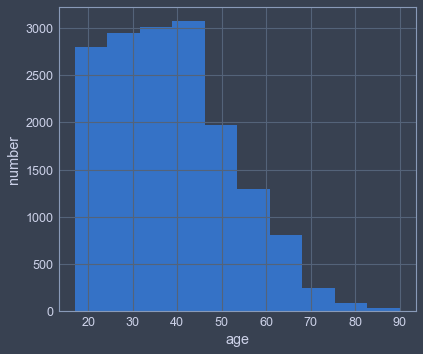

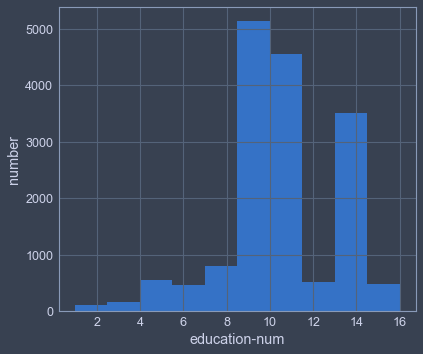

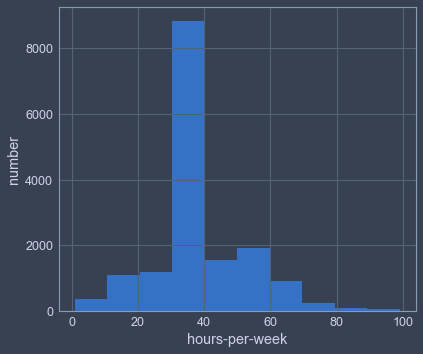

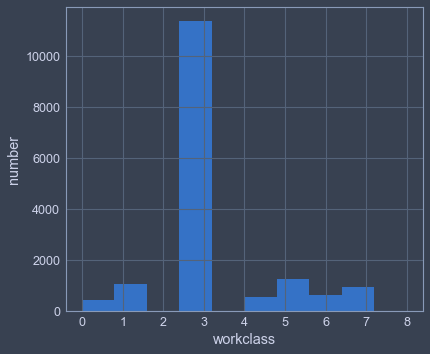

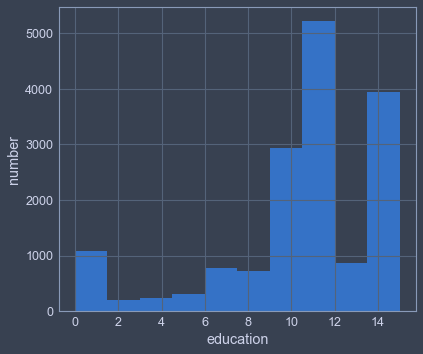

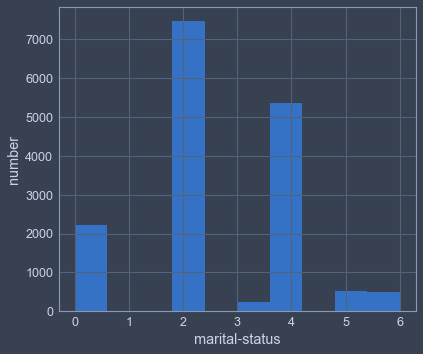

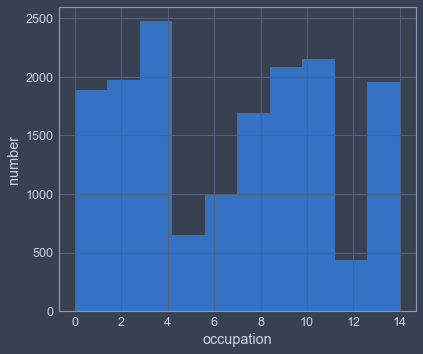

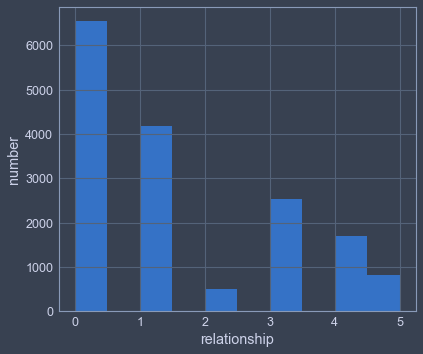

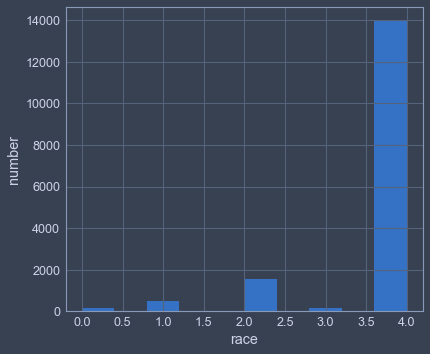

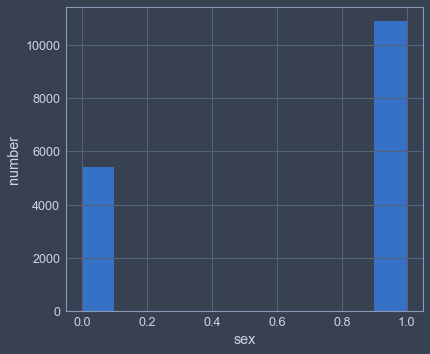

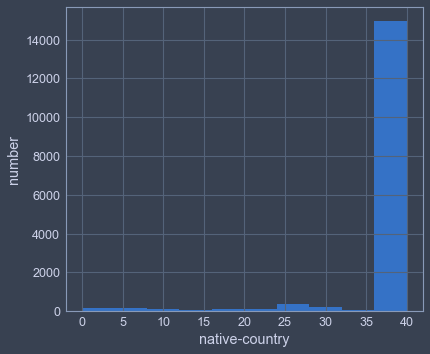

In [45]:
# use the histogram to evaluate the distributions of the features 
for i in range(11):
    plt.hist(X2[:,i])
    plt.xlabel(x_train_fill.columns[i])
    plt.ylabel("number")
    plt.show()

In [46]:
# merge 1st-12th
def mergeEdu(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th']:
        return ' PriorHighSchool'
    elif x in [' 9th', ' 10th', ' 11th', ' 12th']:
        return ' HighSchool'
    else:
        return x
    
x_train_drop["education"] = x_train_drop["education"].apply(mergeEdu)
x_train_fill["education"] = x_train_fill["education"].apply(mergeEdu)

In [47]:
# due to the changes, we need to encode our data again
X1 = catEncoder(x_train_drop)
Y1 = np.array(y_train_drop).reshape([len(y_train_drop), ])

X2 = catEncoder(x_train_fill)
Y2 = np.array(y_train_fill).reshape([len(y_train_fill), ])

# ensure the transformation is correct
assert(X1.shape == x_train_drop.shape)
assert(X2.shape == x_train_fill.shape)
assert(len(Y1) == len(y_train_drop))
assert(len(Y2) == len(y_train_fill))

In [48]:
# standerlize and normalize the training set
def stdAndNorm(x):
    scaler_std = preprocessing.StandardScaler().fit(x)
    scaler_norm = preprocessing.Normalizer().fit(x)
    return scaler_std.transform(x), scaler_norm.transform(x)

X1_std, X1_norm = stdAndNorm(X1)
X2_std, X2_norm = stdAndNorm(X2)

In [49]:
# till now, summarize for the results:
print("Original sets:")
print(" Method1:", "X1", '\t', '\t', "Method2:", "X2")
print("Standerlized sets:")
print(" Method1:", "X1_std", '\t', "Method2:", "X2_std")
print("Normalized sets:")
print(" Method1:", "X1_norm", '\t', "Method2:", "X2_norm")

Original sets:
 Method1: X1 	 	 Method2: X2
Standerlized sets:
 Method1: X1_std 	 Method2: X2_std
Normalized sets:
 Method1: X1_norm 	 Method2: X2_norm


## Experiments

### Question 1
<span style="color:#e6bc53">(1 point) Now set up your experiment. Clearly explain how you divided the data and
how you ensured that your measurements are valid. Use no more than 100 words.</span>

We decide to use KFlod cross-validation to train and test our models because it can make full use of the dataset, and avoid the overfitting problem to some extent. The value of <b>n_splits</b> is set to 10, which means it will use 1 fold for validating, the rest 9 folds for training in one round. In terms of ensuring our measurements, we plotted the learning curve for each training process in order to compare the F1-scores.

### Question 2
<span style="color:#e6bc53">(2 points) Fit the five algorithms using the default hyper-parameters from section 2.1.
Create a useful plot that shows the performances of the algorithms. Clearly explain
what this plot tells us about the performances of the algorithms. Also, clearly explain
why you think some algorithms perform better than others. Use no more than 150
words and two plots (but 1 is sufficient).
</span>

<p>
In figure 1, it shows the learning curve of testing curves. Using the default setting, SVM, always owning the highest F1-score no matter how large the training size is, is the currently best algorithm among others. 
</p>
<p>
The performances of the algorithms strongly rely on the training samples and their initial hyper-parameters setting. If SVM performances well on this dataset, this dataset probably has a relatively clear margin of classification, which means there are a few overlapping samples of two different classes. The fourth one is Decision Tree, but it should be noticed that its training curve and testing curve do not have a convergent trend with the increase of training size, shown in figure 2; therefore, its performance may be promoted after hyper-parameter tuning. The final one is Gaussian classifier, which can be adversely influenced by the real distribution of the samples.
</p>


In [135]:
# build up five algorithms using default values as the requirements
random_state = 42
n_splits = 10

models = {
    "GaussianNB": GaussianNB(),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=None, 
        min_samples_leaf=2, 
        random_state=random_state
    ),
    
    "KNeighborsClassifier": KNeighborsClassifier(
        n_neighbors=3, 
        weights="distance"
    ),
    
    "SVM": SVC(
        C=10, 
        kernel="poly", 
        random_state=random_state
    ),
    
    "LogisticRegression": LogisticRegression(
        C=10,
        penalty="none",
        random_state=random_state
    ),
}


In [136]:
# Solution 1: visulization
# plot the validation curve
def validationCurve(X, Y):
#     initialize KFold cross-validation
    cv = KFold(n_splits=10, random_state=random_state, shuffle=True)
    for name, model in models.items():
        train_sizes, train_scores, valid_scores = learning_curve(model,
                                                                X, Y,
                                                                train_sizes=np.linspace(0.1, 1, 10),
                                                                cv=cv,
                                                                scoring='f1_weighted',
                                                                n_jobs=8
                                                               )
        train_scores_mean = np.mean(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        plt.plot(train_sizes, train_scores_mean, label="train_scores")
        plt.plot(train_sizes, valid_scores_mean, label="valid_scores")
        plt.xlabel("train_sizes")
        plt.ylabel("F1_scores")
        plt.title(name+"_learning_curve")
        plt.show()

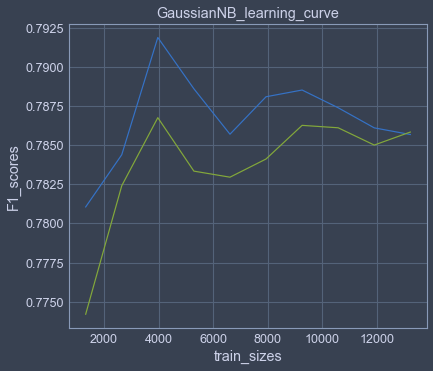

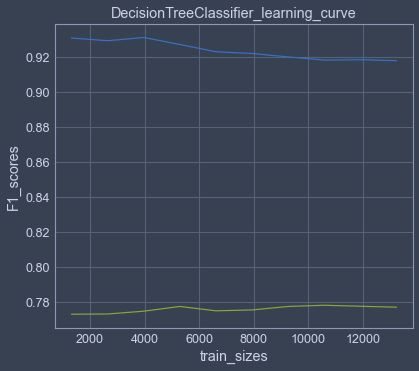

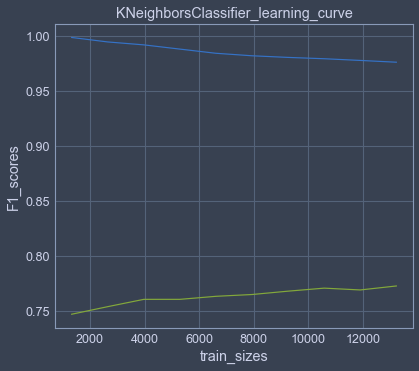

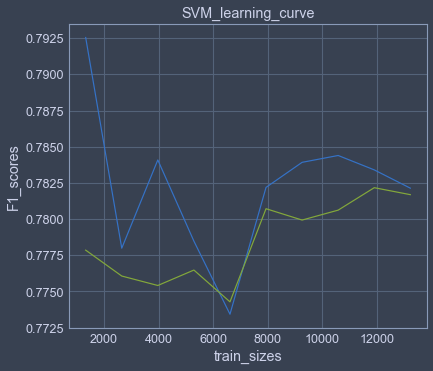

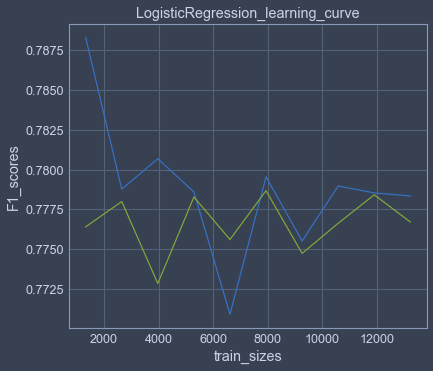

In [137]:
# here, we only use the original X1
validationCurve(X1, Y1)

In [138]:
# Then, we put all validation curves together to find the best one
# plot the validation curve
def validationCurveInOne(X, Y, saveName):
#     initialize KFold cross-validation
    cv = KFold(n_splits=10, random_state=random_state, shuffle=True)
    
#     define the socring metric
    scoring_method_F1 = make_scorer(lambda prediction, true_target:
                            f1_score(true_target, prediction, average="weighted"))

#     define the figure size and dpi
    plt.figure(figsize=(8,8), dpi=200)
    
#     start plotting
    for _, model in models.items():
        train_sizes, _, valid_scores = learning_curve(model,
                                                      X, Y,
                                                      train_sizes=np.linspace(0.1, 1, 10),
                                                      cv=cv,
                                                      scoring=scoring_method_F1,
                                                      n_jobs=8
                                                     )
        valid_scores_mean = np.mean(valid_scores, axis=1)
        plt.plot(train_sizes, valid_scores_mean)
    plt.title("validating F1-score curves")
    plt.xlabel("train_sizes")
    plt.ylabel("F1_scores")
    plt.legend([name for name, _ in models.items()], loc="upper left")
    plt.savefig("./figures/"+saveName)
    plt.show()

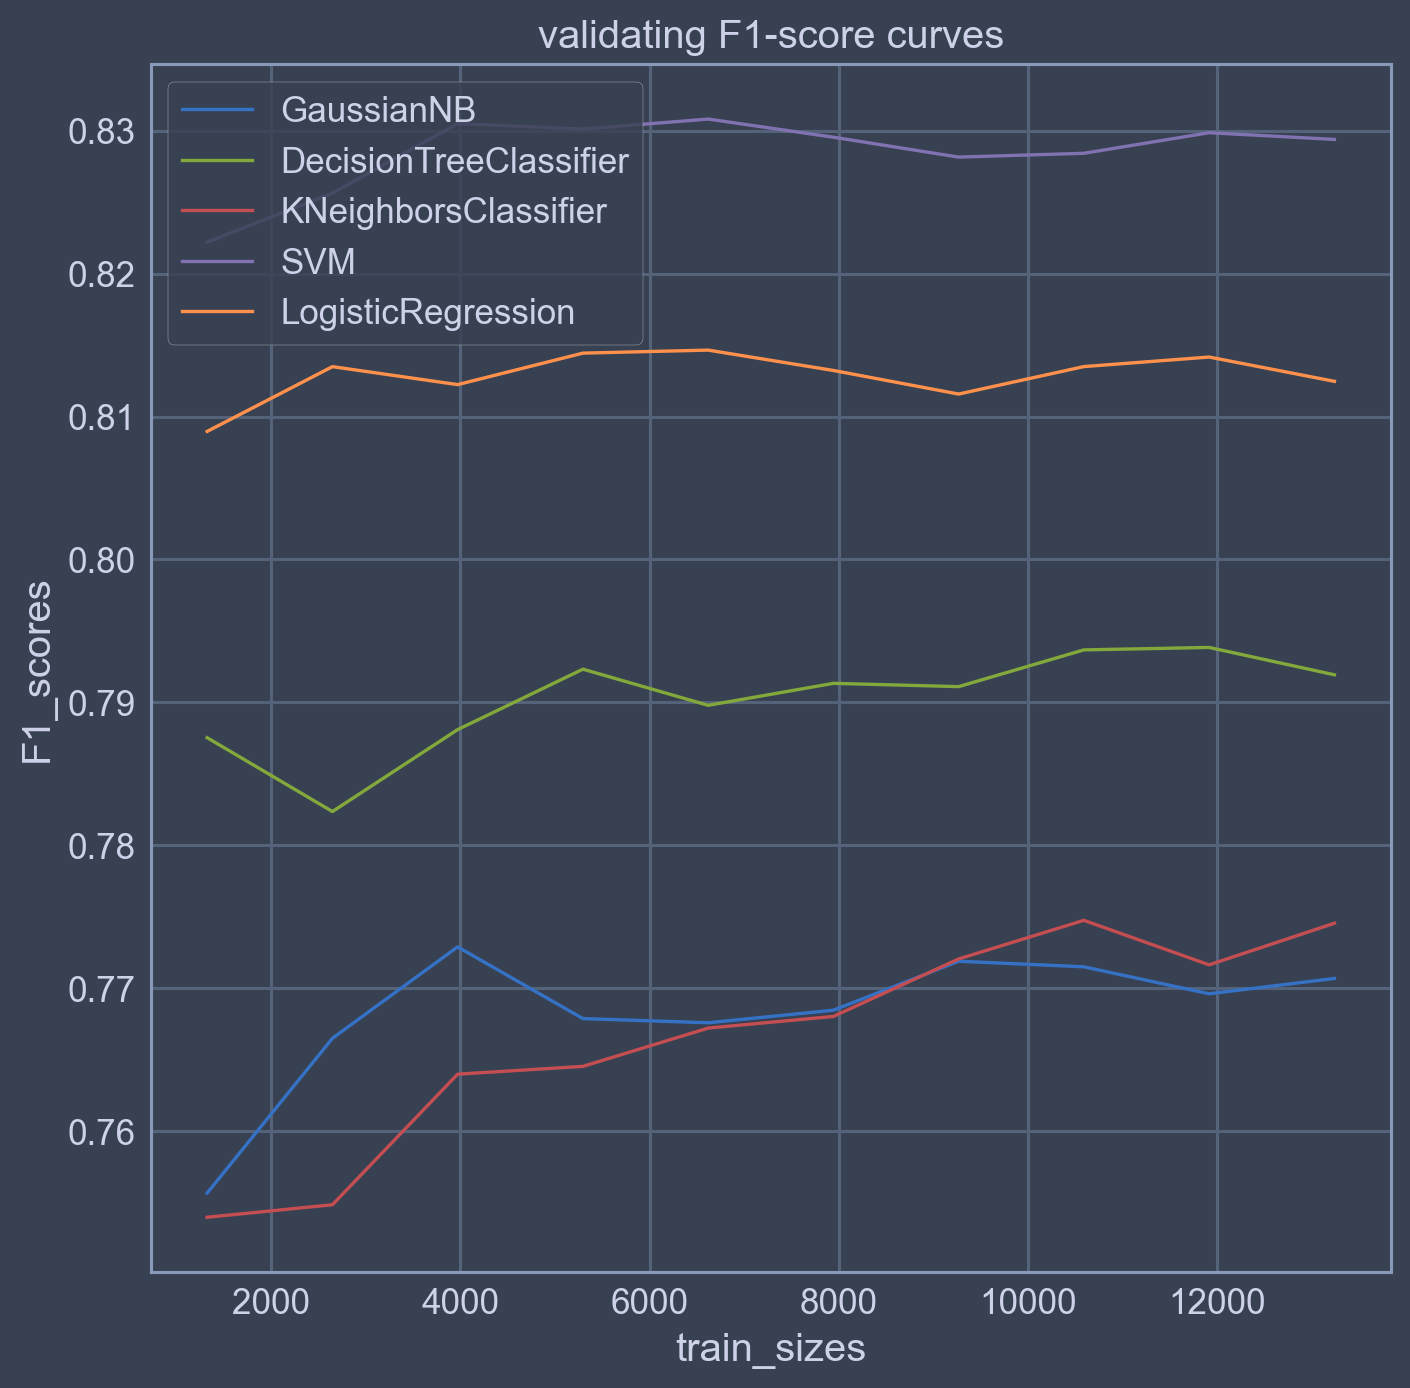

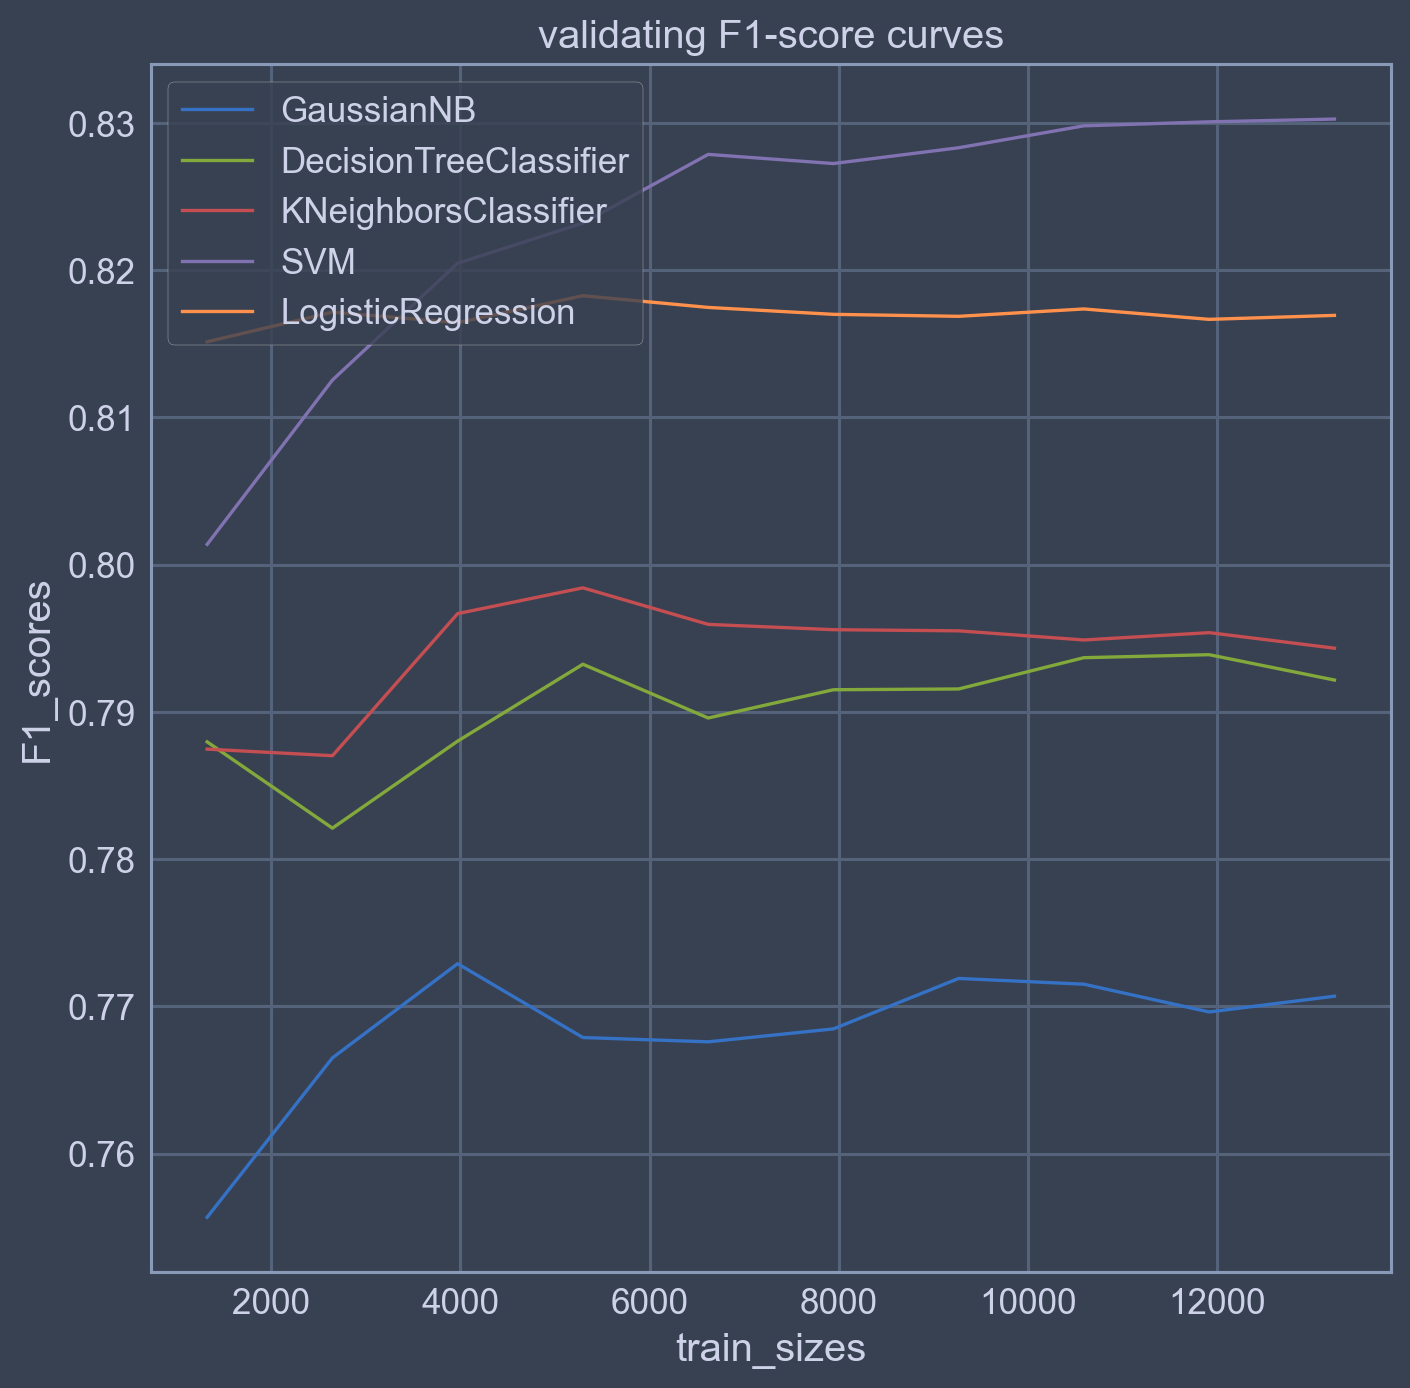

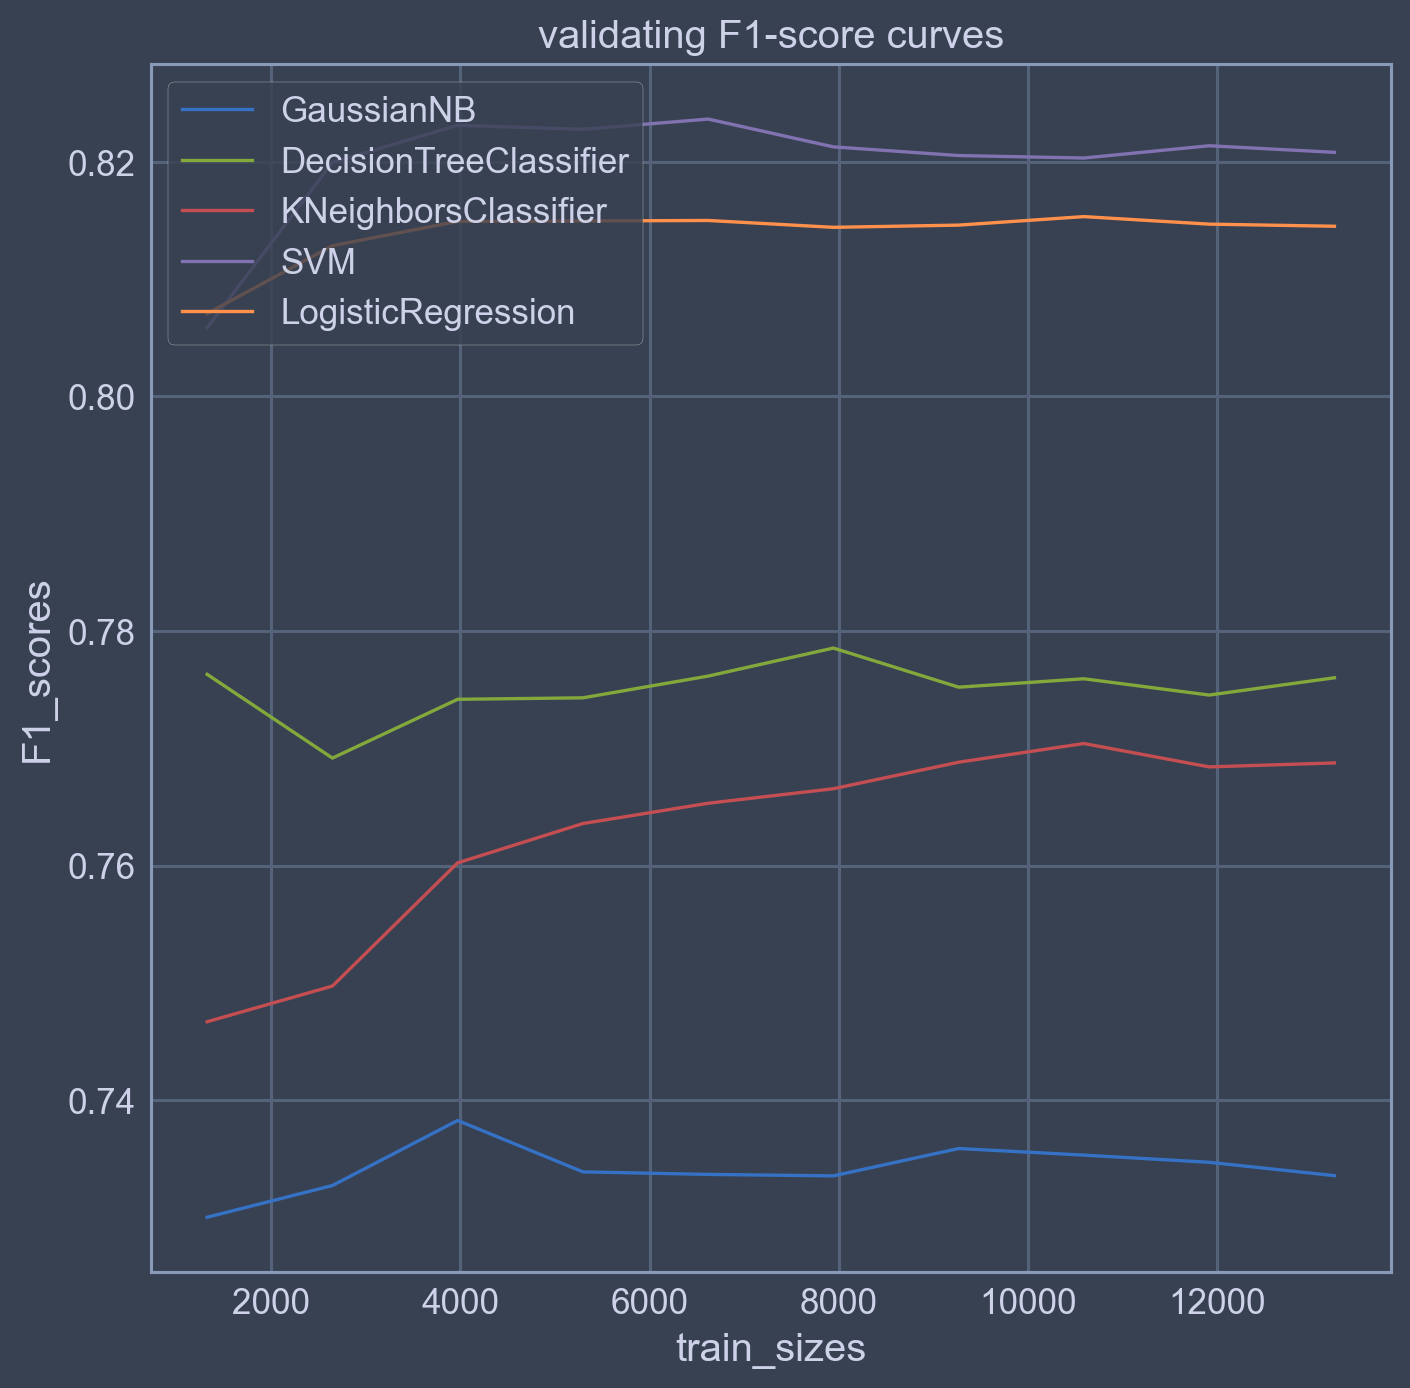

In [139]:
# here, we use the X1, X1_std, X1_norm and X2, X2_std, X2_norm 
validationCurveInOne(X1, Y1, "X1")
validationCurveInOne(X1_std, Y1, "X1_std")
validationCurveInOne(X1_norm, Y1, "X1_norm")

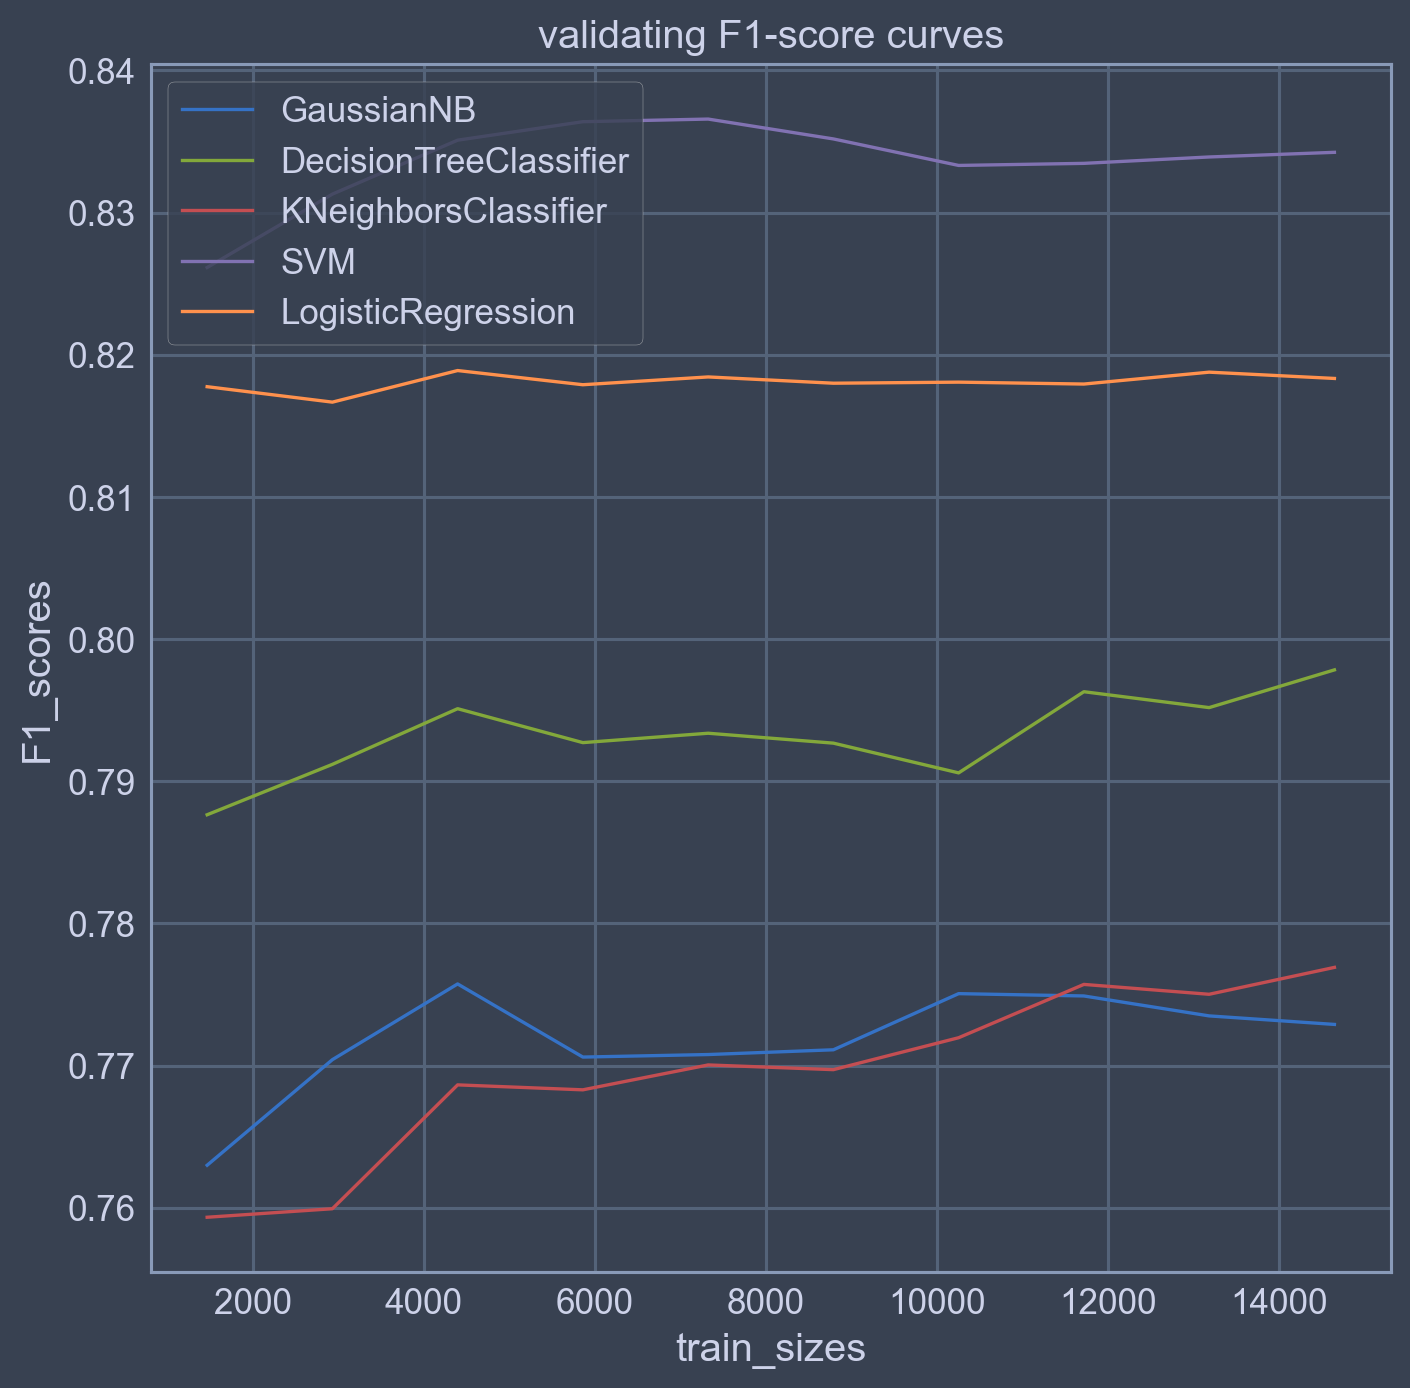

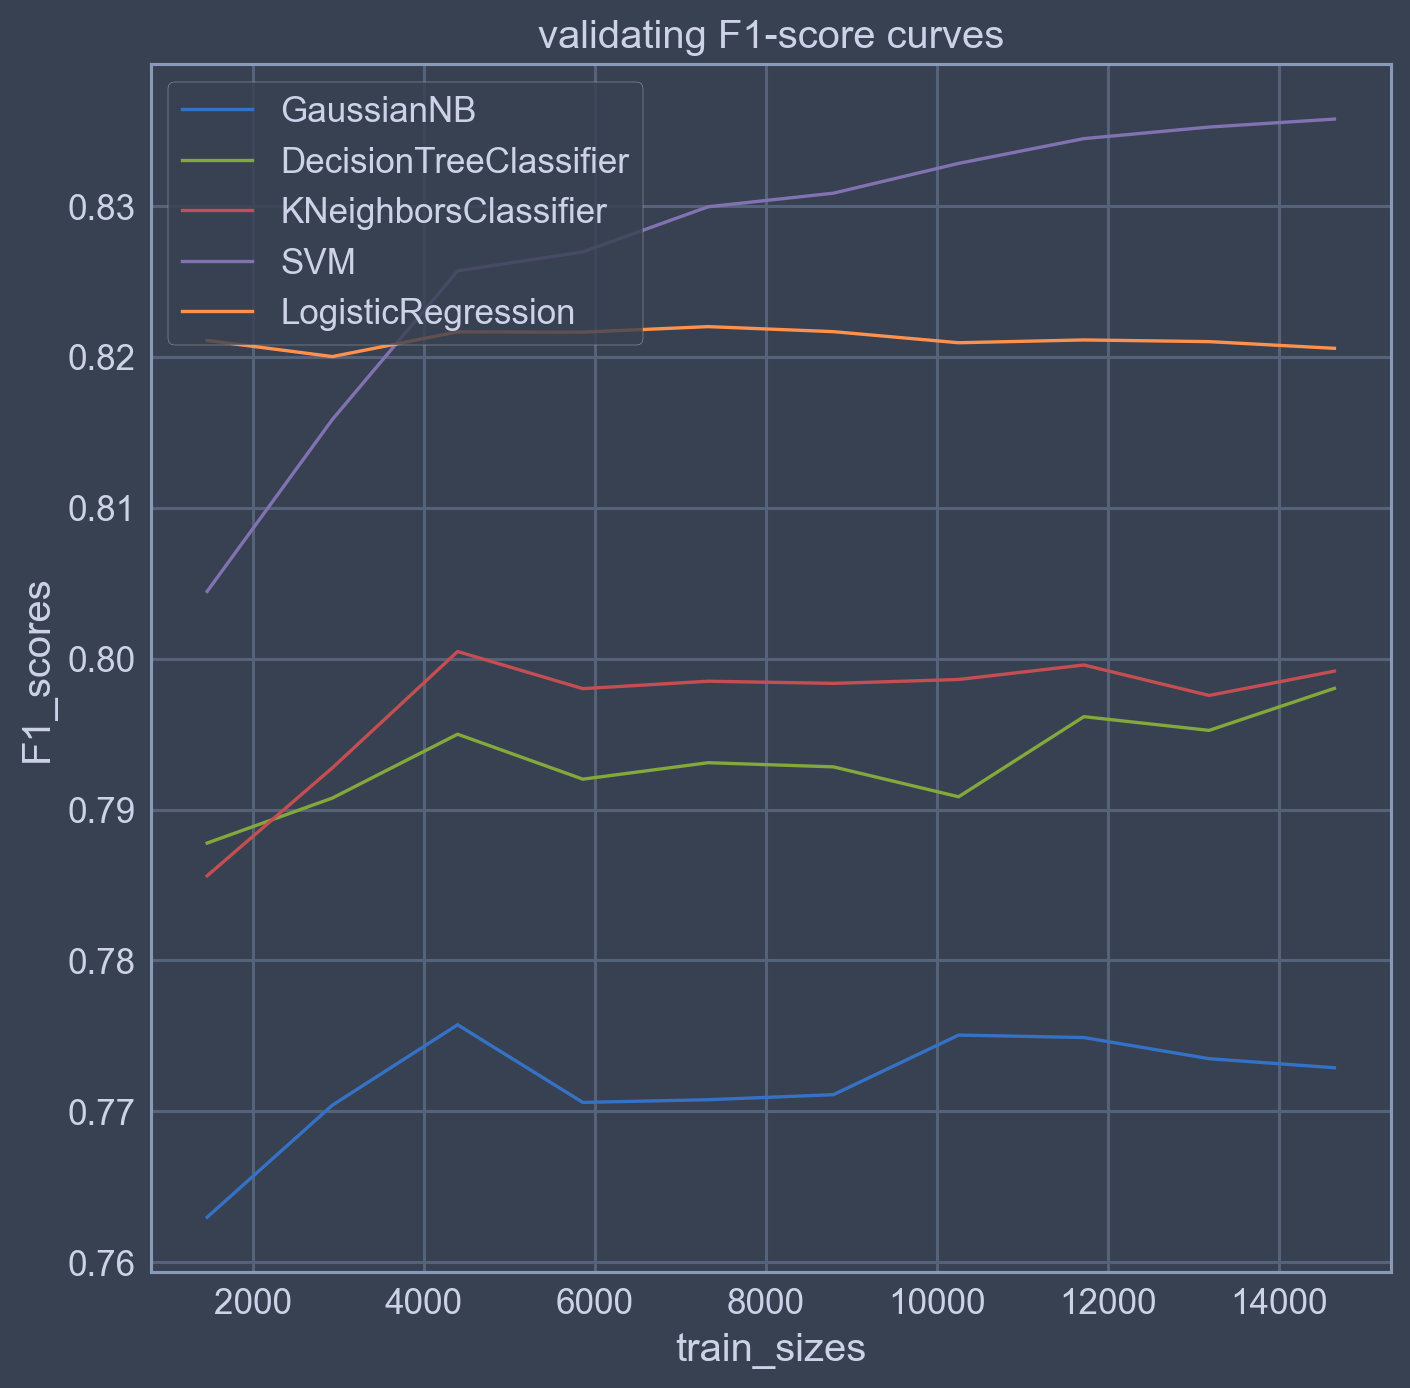

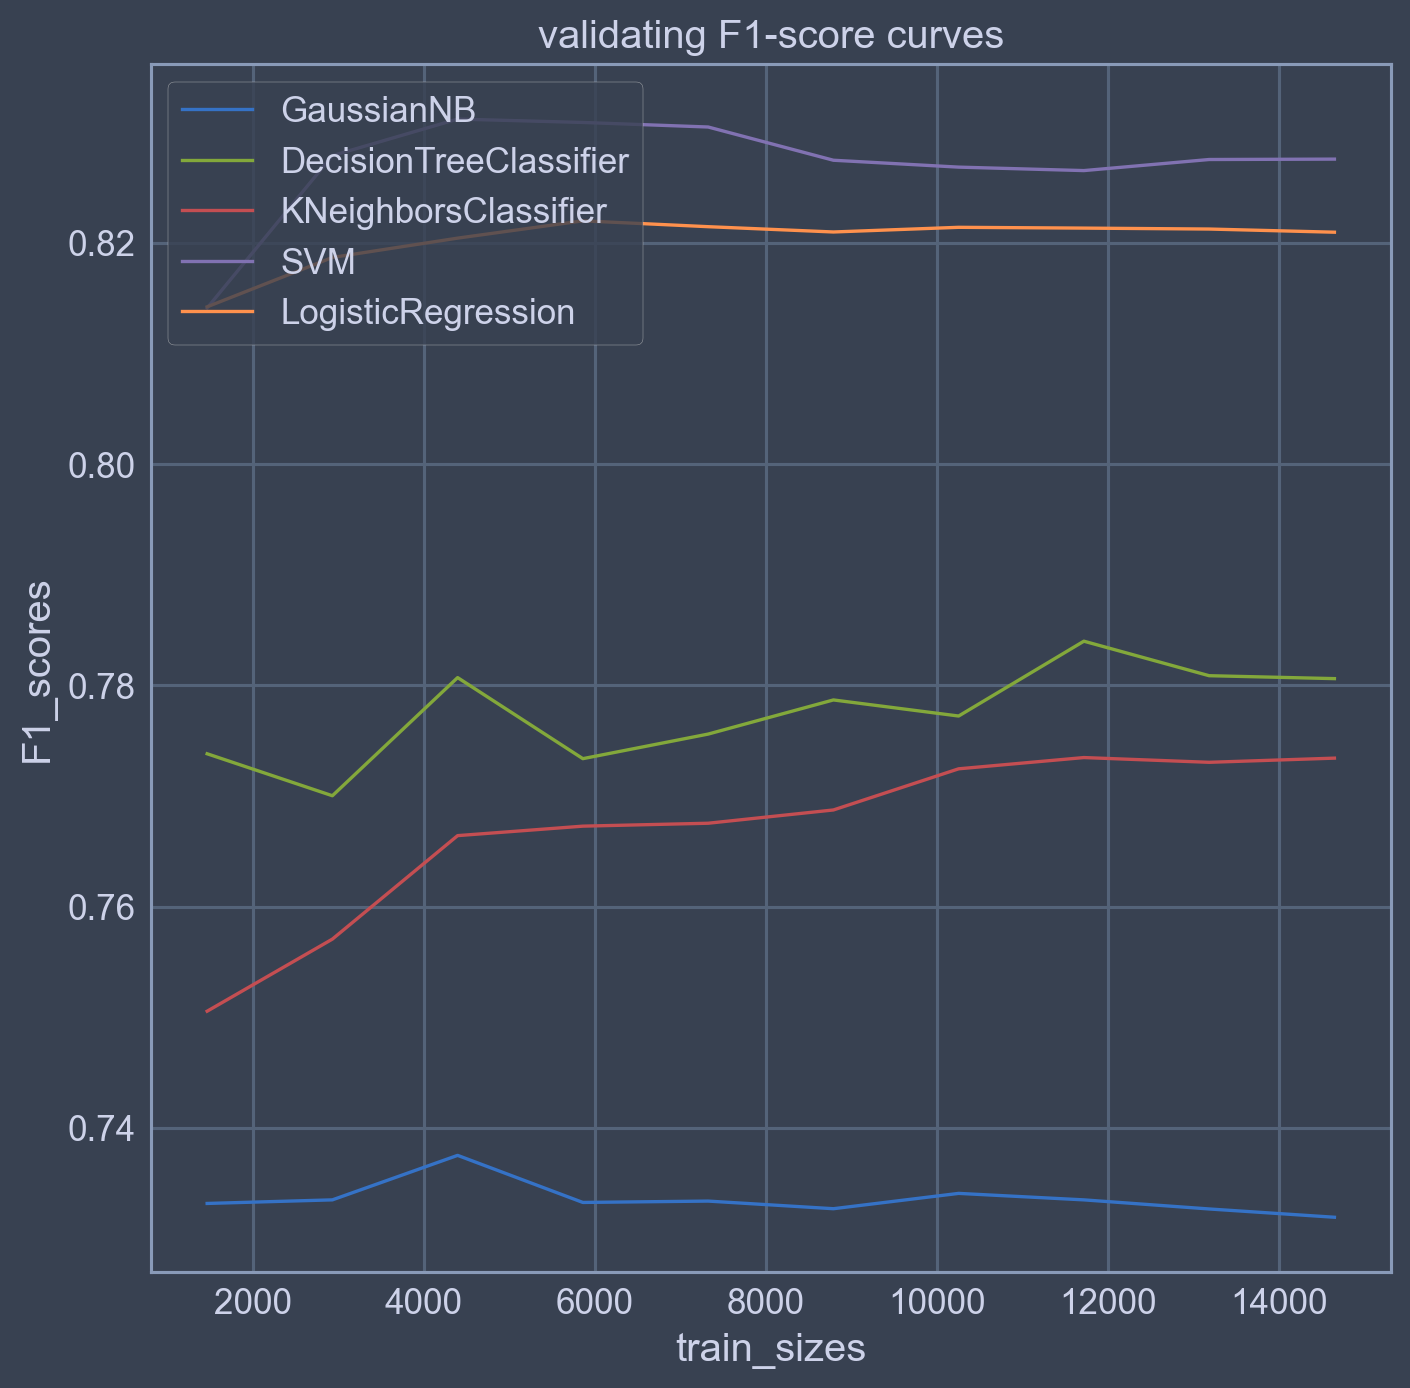

In [140]:
validationCurveInOne(X2, Y2, "X2")
validationCurveInOne(X2_std, Y2, "X2_std")
validationCurveInOne(X2_norm, Y2, "X2_norm")

In [56]:
# Method 2: Only Show The Final Result
# validate the models by testing data

# generate measurements for validation (K-flod cross validation)
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits):
    # define evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate model
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
    
    return scores["test_score"]

def accAndF1(X, Y):
    scoring_method_F1 = make_scorer(lambda prediction, true_target:
                                f1_score(true_target, prediction, average="weighted"))
    scoring_method_acc = make_scorer(lambda prediction, true_target:
                                 accuracy_score(true_target, prediction))
    for name, model in models.items():
        print(name)
        metrics_F1 = k_fold_fit_and_evaluate(X, Y, model, scoring_method_F1, n_splits=10)
        metrics_acc = k_fold_fit_and_evaluate(X, Y, model, scoring_method_acc, n_splits=10)
        print(" mean F1:", '\t', " std F1")
        print(format(np.mean(metrics_F1),"5f"), '\t', format(np.std(metrics_F1),"5f"))
        print(" mean Accuracy", '\t', " std Accuracy")
        print(format(np.mean(metrics_acc),"5f"), '\t', format(np.std(metrics_acc),"5f"))
        print()

In [57]:
# here, we use the X1, X1_std, X1_norm and X2, X2_std, X2_norm 
print("-------------------X1-------------------")
accAndF1(X1, Y1)
print("-------------------X1_std-------------------")
accAndF1(X1_std, Y1)
print("-------------------X1_norm-------------------")
accAndF1(X1_norm, Y1)
print("-------------------X2-------------------")
accAndF1(X2, Y2)
print("-------------------X2_std-------------------")
accAndF1(X2_std, Y2)
print("-------------------X2_norm-------------------")
accAndF1(X2_norm, Y2)

-------------------X1-------------------
GaussianNB
 mean F1: 	  std F1
0.770697 	 0.013982
 mean Accuracy 	  std Accuracy
0.778269 	 0.013058

DecisionTreeClassifier
 mean F1: 	  std F1
0.791619 	 0.008875
 mean Accuracy 	  std Accuracy
0.784117 	 0.008973

KNeighborsClassifier
 mean F1: 	  std F1
0.774820 	 0.009581
 mean Accuracy 	  std Accuracy
0.773783 	 0.009178

SVM
 mean F1: 	  std F1
0.829381 	 0.007416
 mean Accuracy 	  std Accuracy
0.805536 	 0.008873

LogisticRegression
 mean F1: 	  std F1
0.812504 	 0.009762
 mean Accuracy 	  std Accuracy
0.794724 	 0.010115

-------------------X1_std-------------------
GaussianNB
 mean F1: 	  std F1
0.770697 	 0.013982
 mean Accuracy 	  std Accuracy
0.778269 	 0.013058

DecisionTreeClassifier
 mean F1: 	  std F1
0.791927 	 0.009217
 mean Accuracy 	  std Accuracy
0.784389 	 0.009270

KNeighborsClassifier
 mean F1: 	  std F1
0.794532 	 0.011223
 mean Accuracy 	  std Accuracy
0.792481 	 0.010932

SVM
 mean F1: 	  std F1
0.830476 	 0.006707
 

### Question 3
<span style="color:#e6bc53">(2 points) Now perform hyper-parameter tuning on the key hyper-parameters you have
previously identified. Clearly explain what you did to be systematic, what you did to get
fair results, what trade-off accuracy vs resources trade-off, etc. Use no more than 200
words.
Note: First focus on tuning the default hyper-parameters, this should be sufficient.
Only look at others if time permits it.</span>

<p><b>Systematic</b>: In order to exhaustively search the best parameters, we adapt GridSearchCV. Using this method, we can define a group of values for each parameter of a model, which will be tested independently each time, and GridSearchCV will return the best combination of values for each algorithm. 

<p><b>Fairness</b>: We cannot access to the best values before training and validating. Therefore, we need to trial. Initially, we will set a rough range of values to test their performances. Then, we will narrow down the ranges of the parameters according to the feedback of GridSearchCV. We also set multiple random states so as to get the best result for each model, because the random state can influence the accuracy, even the effect is not significant.

<p><b>Trade-off</b>: The first limitation is the number of samples; therefore, every round we will feed the model with all samples. The second limitation is the wide range of parameters, and especially it will spend a long period for training if the ranges are set too wide. The third one is the trade-off between accuracy and overfitting. Therefore, we need to stop narrow down when the accuracy is not significantly promoted after tuning.


In [58]:
# set the testing range of parameters for each model
model_parameters = {
    "GaussianNB": {
    
    },
    
    "DecisionTreeClassifier": {
        'min_samples_leaf': [2, 4, 6, 8, 10],
        'max_depth': [None, 5, 10, 15, 20, 25],
        'random_state': [40, 41, 42, 43, 44]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [3, 7, 9, 13, 15, 19],
        "weights": ["distance", "uniform"] 
    },
    
    "SVM": {
        "C": [5, 10, 15, 20, 25],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "random_state": [40, 41, 42, 43, 44]
    },
    
    "LogisticRegression": {
        "C": [5, 10, 15, 20, 25],
        "penalty": ['l1', 'l2', 'elasticnet', 'none'],
        "random_state": [40, 41, 42, 43, 44]
    }
}


In [59]:
# In the first round, we want to find the best value in a rough range

scoring_method = make_scorer(lambda prediction, true_target: f1_score(true_target, prediction, average="weighted"))
cv = KFold(n_splits=n_splits, shuffle=True)

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=8, verbose=False, scoring=scoring_method).fit(X2_std, Y2)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

GaussianNB
- best_score = 0.7722473037027567
best paramters:
DecisionTreeClassifier
- best_score = 0.8376374642974515
best paramters:
- max_depth 5
- min_samples_leaf 6
- random_state 40
KNeighborsClassifier
- best_score = 0.8264599860459454
best paramters:
- n_neighbors 19
- weights uniform
SVM
- best_score = 0.8361157631755974
best paramters:
- C 5
- kernel rbf
- random_state 40
LogisticRegression
- best_score = 0.8216275089254971
best paramters:
- C 5
- penalty none
- random_state 40


In [66]:
# set the testing range of parameters for each model
model_parameters = {
    "DecisionTreeClassifier": {
        'min_samples_leaf': [4, 5, 6, 7, 8],
        'max_depth': [1, 3, 5, 7, 9],
        'random_state': [40, 41, 42, 43, 44]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [20, 25, 30, 35, 40],
        "weights": ["distance"] 
    },
    
    "SVM": {
        "C": [1, 3, 5, 7, 9],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "random_state": [40, 41, 42, 43, 44]
    },
    
    "LogisticRegression": {
        "C": [1, 3, 5, 7, 9],
        "penalty": ['l1', 'l2', 'elasticnet', 'none'],
        "random_state": [40, 41, 42, 43, 44]
    }
}


In [67]:
# In the second round, we want to find the best value in a narrowed-down range

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=8, verbose=False, scoring=scoring_method).fit(X2_std, Y2)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

DecisionTreeClassifier
- best_score = 0.8630975795991551
best paramters:
- max_depth 1
- min_samples_leaf 4
- random_state 40
KNeighborsClassifier
- best_score = 0.8227481659832018
best paramters:
- n_neighbors 40
- weights distance
SVM
- best_score = 0.837413272023403
best paramters:
- C 1
- kernel rbf
- random_state 40
LogisticRegression
- best_score = 0.8214468066566845
best paramters:
- C 1
- penalty l2
- random_state 40


In [91]:
# after tuning, we will check whether they are overfitting
models = {
    "GaussianNB": GaussianNB(),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=1, 
        min_samples_leaf=4, 
        random_state=random_state
    ),
    
    "KNeighborsClassifier": KNeighborsClassifier(
        n_neighbors=40, 
        weights="distance"
    ),
    
    "SVM": SVC(
        C=1, 
        kernel="rbf", 
        random_state=random_state
    ),
    
    "LogisticRegression": LogisticRegression(
        C=1,
        penalty="l2",
        random_state=random_state
    ),
}


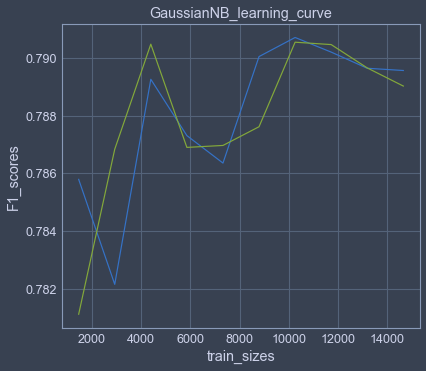

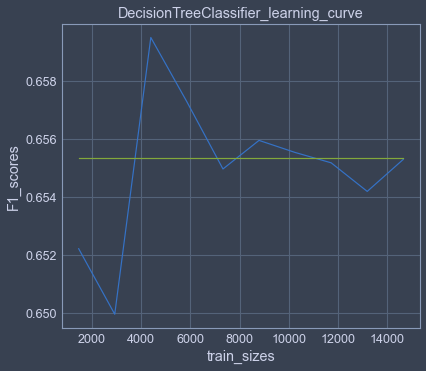

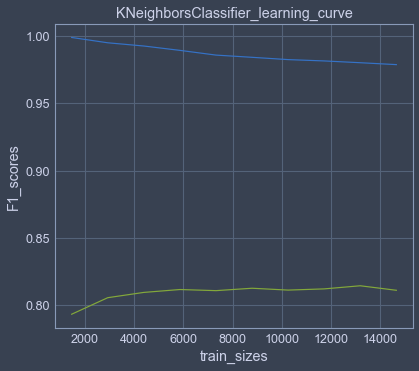

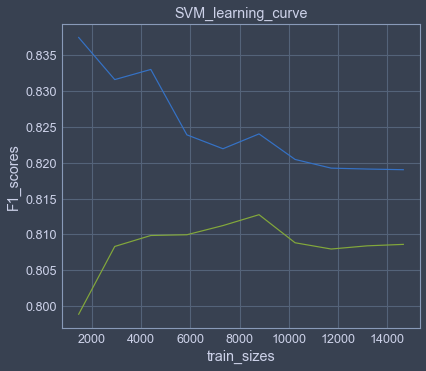

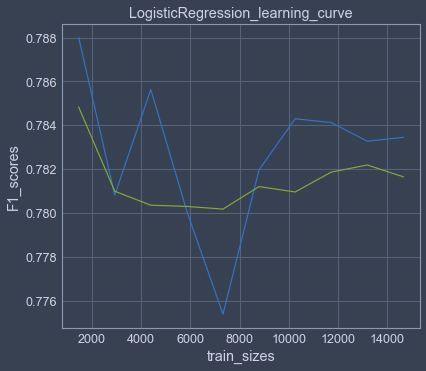

In [92]:
validationCurve(X2_std, Y2)

In [75]:
# Oops, some of them are overfitting
# as max_depth is for DecisionTreeClassifier to avoid overfitting, so as C does for SVM and LogisticRegression
# we should do the trade-off between avoiding overfitting and achieving high accuracy
# let's use the values larger than 5 for them

In [93]:
# set the testing range of parameters for each model
model_parameters = {
    "GaussianNB": {
    
    },
    
    "DecisionTreeClassifier": {
        'min_samples_leaf': [2, 3, 5, 4, 6, 7, 8, 9, 10],
        'max_depth': [5, 6, 7, 8, 9, 10],
        'random_state': [30, 40, 50, 60, 70]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [40, 60, 80, 100],
        "weights": ["distance"]
    },
    
    "SVM": {
        "C": [5, 6, 7, 8, 9, 10],
        "kernel": ['rbf'],
        "random_state": [30, 40, 50, 60, 70]
    },
    
    "LogisticRegression": {
        "C": [5, 6, 7, 8, 9, 10],
        "penalty": ['l2'],
        "random_state": [30, 40, 50, 60, 70]
    }
}

In [94]:
# The third round

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=8, verbose=False, scoring=scoring_method).fit(X2_std, Y2)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)
        
# we don't want to tune any as the accuracy is not imporved significantly 

GaussianNB
- best_score = 0.7728060652293511
best paramters:
DecisionTreeClassifier
- best_score = 0.8356321802228154
best paramters:
- max_depth 8
- min_samples_leaf 4
- random_state 30
KNeighborsClassifier
- best_score = 0.8253579471551402
best paramters:
- n_neighbors 80
- weights distance
SVM
- best_score = 0.8347576589682321
best paramters:
- C 5
- kernel rbf
- random_state 30
LogisticRegression
- best_score = 0.8211943661898277
best paramters:
- C 5
- penalty l2
- random_state 30


### Question 4
<span style="color:#e6bc53">(2 points) Compare the performance of the algorithms with and without hyper-parameter tuning. How did the tuning affect your result? Clearly explain the results and the differences. Use no more than 100 words and two plots (but 1 is sufficient).</span>

In figure 3, After hyper-parameter tuning, all the accuracies of the algorithms have been improved significantly excluding SVM, but SVM still performs well and locates at the first positions. DecisionTreeClassifier, which was the worst algorithm (except Guassian), now becomes the second one. Following that are K-Neighbors and LogisticRegressionClassifiers. We do not provide the Gaussian here, since it is not required to adjust hyper-parameters. Back to DecisionTreeClassifier, it now has the trend of convergence with the increasing of training size shown in figure 4. Hence, hyper-parameters tuning can promote the learning ablity of a model. 

In [141]:
models = {    
    "DecisionTreeClassifier-default": DecisionTreeClassifier(
        max_depth=None, 
        min_samples_leaf=2, 
        random_state=random_state
    ),
    
    "DecisionTreeClassifier-tuned": DecisionTreeClassifier(
        max_depth=8, 
        min_samples_leaf=4, 
        random_state=30
    ),
    
    "KNeighborsClassifier-default": KNeighborsClassifier(
        n_neighbors=3, 
        weights="distance"
    ),
    
    "KNeighborsClassifier-tuned": KNeighborsClassifier(
        n_neighbors=80, 
        weights="distance"
    ),
    
    "SVM-default": SVC(
        C=10, 
        kernel="poly", 
        random_state=random_state
    ),
    
    "SVM-tuned": SVC(
        C=5, 
        kernel="rbf", 
        random_state=30
    ),
    
    "LogisticRegression-default": LogisticRegression(
        C=10,
        penalty="none",
        random_state=random_state
    ),
    
    "LogisticRegression-tuned": LogisticRegression(
        C=5,
        penalty="l2",
        random_state=30
    ),
}


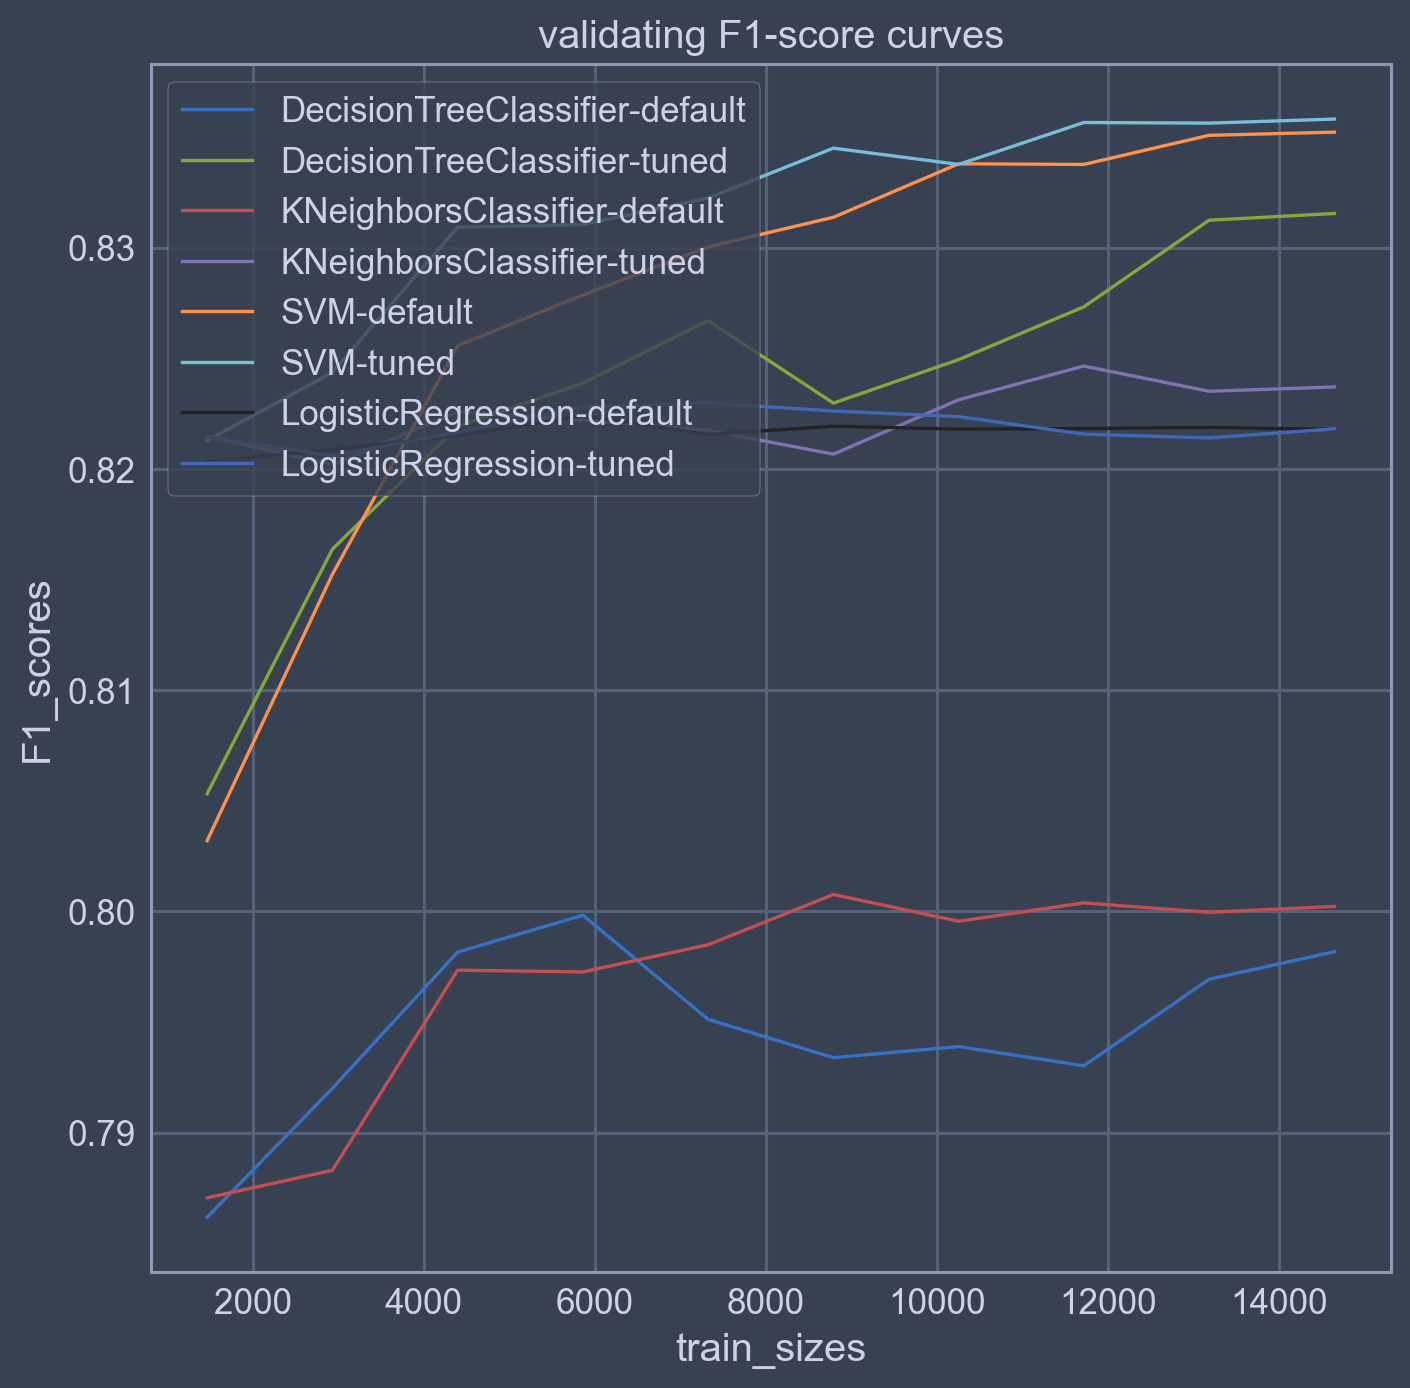

In [142]:
# plot the validation curve
def validationCurveInOne(X, Y, saveName):
#     initialize KFold cross-validation
    cv = KFold(n_splits=10, shuffle=True)
    
#     define the socring metric
    scoring_method_F1 = make_scorer(lambda prediction, true_target:
                            f1_score(true_target, prediction, average="weighted"))

#     define the figure size and dpi
    plt.figure(figsize=(8,8), dpi=200)
    
#     start plotting
    for _, model in models.items():
        train_sizes, _, valid_scores = learning_curve(model,
                                                      X, Y,
                                                      train_sizes=np.linspace(0.1, 1, 10),
                                                      cv=cv,
                                                      scoring=scoring_method_F1,
                                                      n_jobs=-1
                                                     )
        valid_scores_mean = np.mean(valid_scores, axis=1)
        plt.plot(train_sizes, valid_scores_mean)
    plt.title("validating F1-score curves")
    plt.xlabel("train_sizes")
    plt.ylabel("F1_scores")
    plt.legend([name for name, _ in models.items()], loc="upper left")
    plt.savefig("./figures/"+saveName)
    plt.show()
validationCurveInOne(X2_std, Y2, "X2_std_tuned")

### Question 5
<span style="color:#e6bc53">Select your best algorithm for this dataset and use it to make your predictions for the
unknown samples. Please note in you algorithm which algorithm you chose.</span>

We decide to choose Support Vector Machine with the following hyper-parameters:
<p><b>C=5,</b>
<p><b>kernel="rbf",</b> 
<p><b>random_state=30</b>

In [114]:
# there is a singular perculiar sample in the testing set

x_test_raw.loc[x_test_raw['native-country']==' Holand-Netherlands']

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
10542,32,10.0,40,Private,Some-college,Never-married,Machine-op-inspct,Other-relative,White,Female,Holand-Netherlands


In [115]:
# since ' Holand-Netherlands' never appears in training set, it should be corrected to ' Unknown' group

x_test_raw['native-country'].replace(to_replace=" Holand-Netherlands", value=" Unknown", inplace=True)

x_test_raw.loc[x_test_raw['native-country']==' Holand-Netherlands']

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country


In [116]:
# the model is fitted by X2_std, 
# So, all the preprocessing procedures of X2_std will be applied onto x_test_raw

# mimic step 1 - apply(mergeEdu)
x_test = x_test_raw.copy()
x_test["education"] = x_test["education"].apply(mergeEdu)

# mimic step 2 - encode
X3 = catEncoder(x_test)
assert(X3.shape == x_test.shape)

# mimic step 3 - standerlize
X3_std, _ = stdAndNorm(X3)

In [163]:
# The model with the best parameters:
mymodel = SVC(C=5, kernel="rbf", random_state=30)

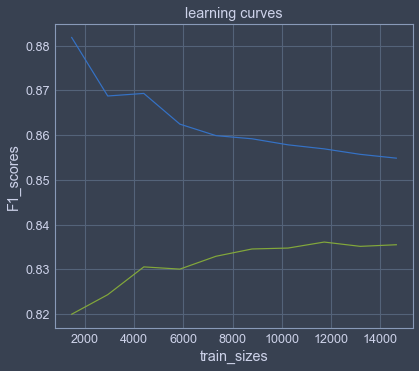

In [164]:
# check the correctness of our model
cv = KFold(n_splits=10, random_state=30, shuffle=True)
scoring_method_F1 = make_scorer(lambda prediction, true_target:
                                f1_score(true_target, prediction, average="weighted"))
train_sizes, train_scores, valid_scores = learning_curve(mymodel,
                                              X2_std, Y2,
                                              train_sizes=np.linspace(0.1, 1, 10),
                                              cv=cv,
                                              scoring=scoring_method_F1,
                                              n_jobs=8
                                             )
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, valid_scores_mean)
plt.title("learning curves")
plt.xlabel("train_sizes")
plt.ylabel("F1_scores")
plt.show()

In [165]:
# do the final prediction
mymodel = mymodel.fit(X2_std, Y2)
prediction = mymodel.predict(X3_std)
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)

In [166]:
# let's use another tuned model to make a comparison
mymodel2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=30).fit(X2_std, Y2)
prediction2 = mymodel2.predict(X3_std)

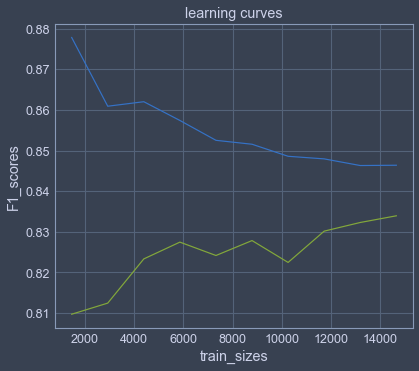

In [167]:
# check the correctness of our model
cv = KFold(n_splits=10, random_state=30, shuffle=True)
scoring_method_F1 = make_scorer(lambda prediction, true_target:
                                f1_score(true_target, prediction, average="weighted"))
train_sizes, train_scores, valid_scores = learning_curve(mymodel2,
                                              X2_std, Y2,
                                              train_sizes=np.linspace(0.1, 1, 10),
                                              cv=cv,
                                              scoring=scoring_method_F1,
                                              n_jobs=8
                                             )
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, valid_scores_mean)
plt.title("learning curves")
plt.xlabel("train_sizes")
plt.ylabel("F1_scores")
plt.show()

In [168]:
print("similarity:", np.sum(prediction == prediction2)/len(X3_std))

similarity: 0.9238489184240862
